<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DAY5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
from glob import glob
import random
import cv2

# Carregar o modelo MobileNetV2 pré-treinado na ImageNet
model = MobileNetV2(weights='imagenet')



In [39]:
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Fire%20images.rar?raw=true' -O fire_images.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%201.rar?raw=true' -O non_fire_images_01.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%202.rar?raw=true' -O non_fire_images_02.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%203.rar?raw=true' -O non_fire_images_03.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%204.rar?raw=true' -O non_fire_images_04.rar
!wget 'https://github.com/cair/Fire-Detection-Image-Dataset/blob/master/Normal%20Images%205.rar?raw=true' -O non_fire_images_05.rar
clear_output()


In [38]:
!unrar x fire_images.rar /content/fire/ -y
!unrar x non_fire_images_01.rar /content/nonfire/ -y
!unrar x non_fire_images_02.rar /content/nonfire/ -y
!unrar x non_fire_images_03.rar /content/nonfire/ -y
!unrar x non_fire_images_04.rar /content/nonfire/ -y
!unrar x non_fire_images_05.rar /content/nonfire/ -y
clear_output()


In [60]:
fire_list = sorted(glob("./fire/**/*.*", recursive=True))
nonfire_list = sorted(glob("./nonfire/**/*.*", recursive=True))

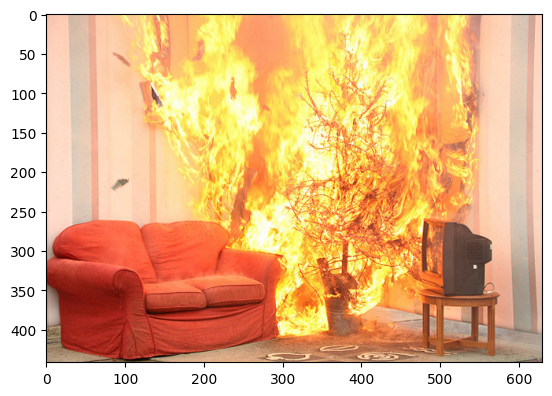

In [51]:
for f in random.sample(fire_list, 1):
  img = cv2.imread(f)[...,::-1]
  plt.imshow(img)
  plt.show()

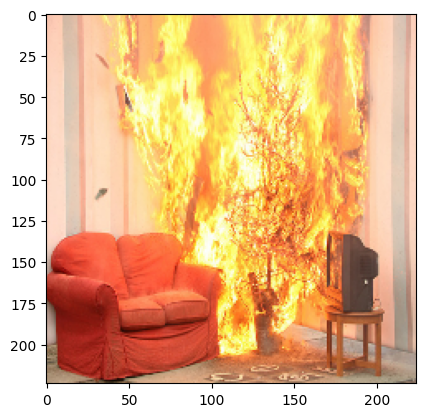

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n04584207', 'wig', 0.1610508), ('n04344873', 'studio_couch', 0.1265371), ('n04429376', 'throne', 0.11298432)]


In [59]:
x = cv2.resize(img,(224,224))[None,...]/255
plt.imshow(x[0])
plt.show()
preds = model.predict(x)
# Decodificar as previsões
print('Predicted:', decode_predictions(preds, top=3)[0])

In [ ]:
# Carregar uma imagem de exemplo (substitua 'path_to_your_image.jpg' pelo caminho da sua imagem)
img_path = 'f58.PNG_6_c.png'
img = image.load_img(img_path, target_size=(224, 224))

# Preprocessar a imagem para adequá-la ao modelo
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Fazer a previsão
preds = model.predict(x)

# Decodificar as previsões
print('Predicted:', decode_predictions(preds, top=3)[0])